In [131]:

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import yaml 
from yaml.loader import UnsafeLoader
import os



In [132]:
from sklearn import datasets

iris = datasets.load_iris()
print(iris)
df = pd.DataFrame(iris.data, columns=iris.feature_names)

df['target'] = iris.target
df.head()

file_name = 'iris_df.csv'
relative_path =   '/../data'

# get save path 
save_path = os.getcwd() +  relative_path # https://stackoverflow.com/questions/39125532/file-does-not-exist-in-jupyter-notebook
full_path = os.path.join(save_path, file_name)
df.to_csv(full_path, index=False)  

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[0 1 2]
['setosa' 'versicolor' 'virginica']


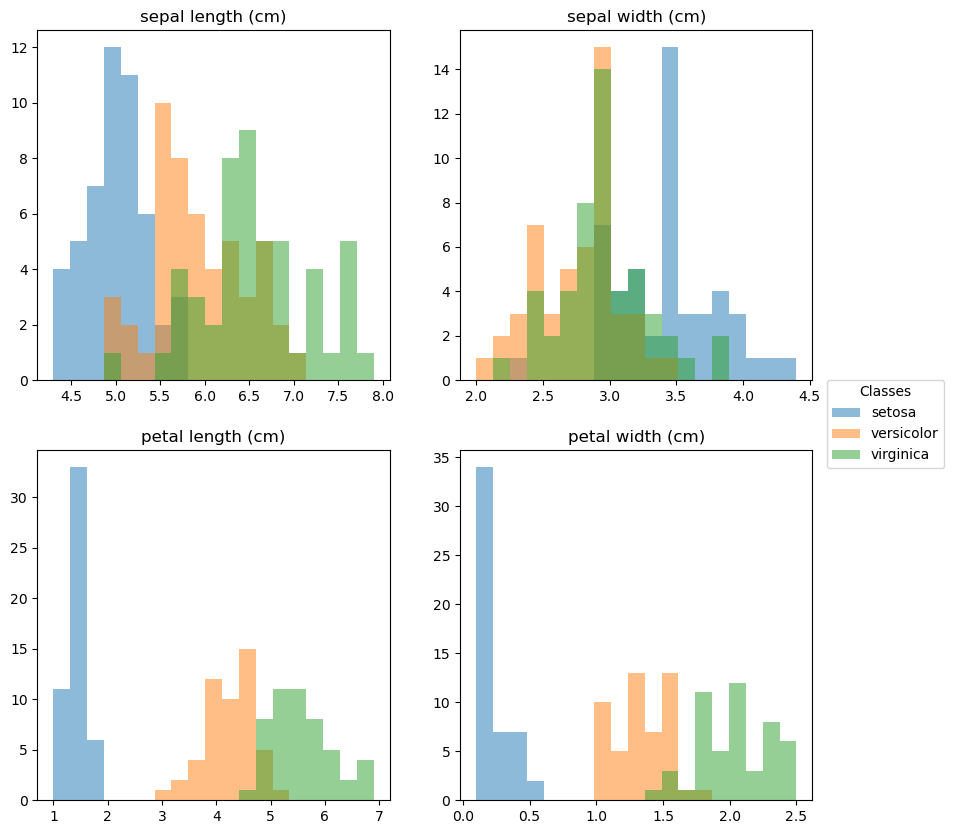

In [133]:
import matplotlib.pyplot as plt

import numpy as np
from sklearn import datasets

dataset = datasets.load_iris()

data = dataset['data']
labels = dataset['target']
var_names = dataset['feature_names']
target_names = dataset['target_names']
print(var_names)
print(np.unique(labels))
print(target_names)

fig = plt.figure(figsize=(10,10))


# loop on variables
for i in range(4):
    # create subplot 
    
    plt.subplot(2,2,i+1)
    # select the variable of interest from the data
    values = data[:,i]
    # define histogram binning. 
    # we use 20 bins between the minimum and maximum values
    bins = np.linspace( np.min(values), np.max(values), 20)
    # loop on categories
    for j in np.unique(labels):
        # select values for this category
        categ_values = values[labels==j]
        # plot histogram
        plt.hist(categ_values, bins, alpha=0.5, label=target_names[j])
    plt.title(var_names[i])
plt.legend(loc=(1.04, 0.950), title="Classes")



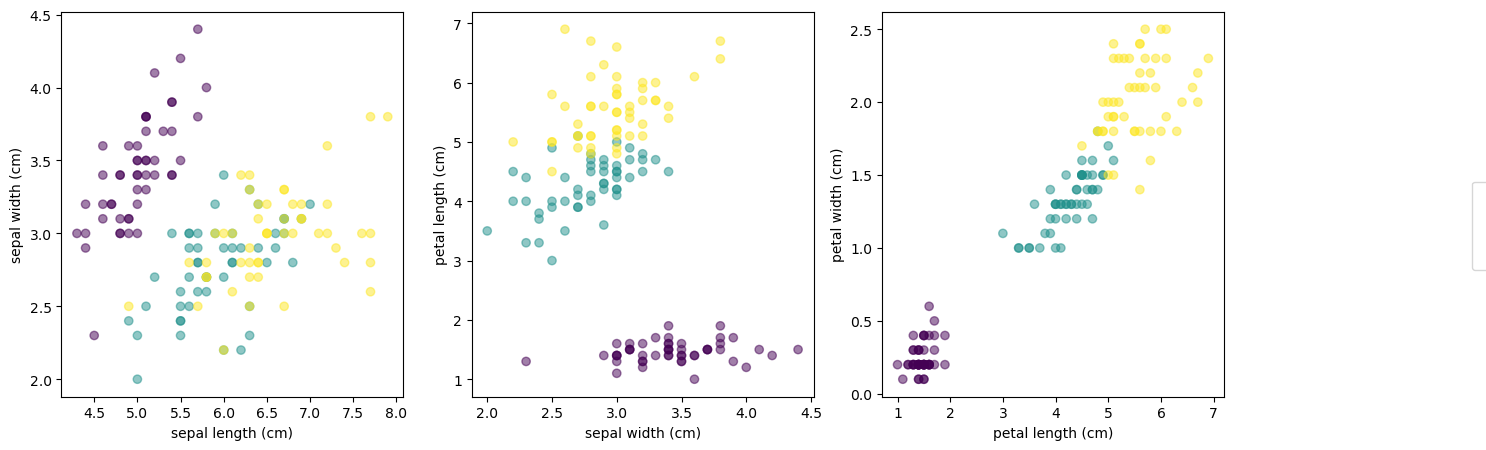

In [134]:


fig, axs = plt.subplots(1,3, figsize=(15,5))
for i in range(3):
    j = i+1
    # we plot variable 1 vs 0, then 2 vs 1, then 3 vs 2
    scatter = axs[i].scatter(data[:,i], data[:, j], c=labels, alpha=0.5)
    axs[i].set_xlabel(var_names[i])
    axs[i].set_ylabel(var_names[j])
elems = list(scatter.legend_elements())
# by default, the legend labels are the values 
# of the target, 0, 1, 2. 
# we replace that with the target names:
elems[1] = target_names
fig.legend(*elems, loc=(0.99, 0.4), title="Classes")


Text(0.5, 1.0, 'Scatter Plot of Iris dataset')

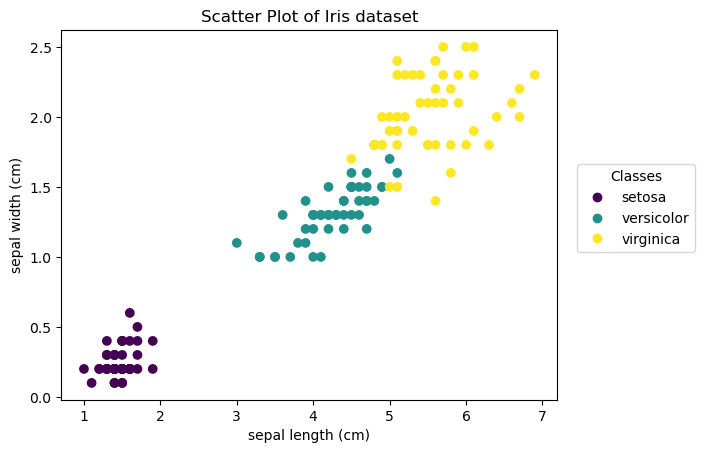

In [135]:
from sklearn import datasets

iris = datasets.load_iris()
import matplotlib.pyplot as plt

_, ax = plt.subplots()
scatter = ax.scatter(iris.data[:, 2], iris.data[:, 3], c=iris.target)
ax.set(xlabel=iris.feature_names[0], ylabel=iris.feature_names[1])
_ = ax.legend(
    scatter.legend_elements()[0], iris.target_names, loc=(1.04, 0.4), title="Classes"
)



ax.set_title("Scatter Plot of Iris dataset")

Text(0.5, 1.0, 'Scatter Plot of Iris dataset')

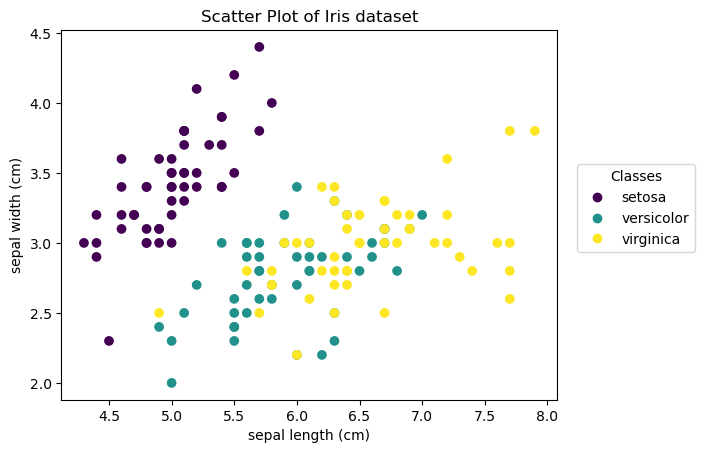

In [136]:
from sklearn import datasets

iris = datasets.load_iris()
import matplotlib.pyplot as plt

_, ax = plt.subplots()
scatter = ax.scatter(iris.data[:, 0], iris.data[:, 1], c=iris.target)
ax.set(xlabel=iris.feature_names[0], ylabel=iris.feature_names[1])
_ = ax.legend(
    scatter.legend_elements()[0], iris.target_names, loc=(1.04, 0.4), title="Classes"
)



ax.set_title("Scatter Plot of Iris dataset")

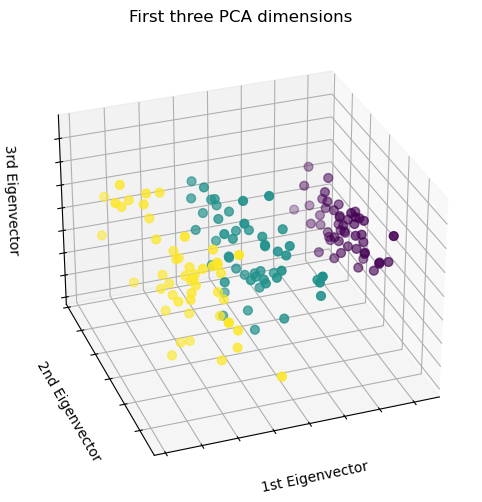

In [137]:
# unused but required import for doing 3d projections with matplotlib < 3.2
import mpl_toolkits.mplot3d  # noqa: F401

from sklearn.decomposition import PCA

fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d", elev=-150, azim=110)

X_reduced = PCA(n_components=3).fit_transform(iris.data)
ax.scatter(
    X_reduced[:, 0],
    X_reduced[:, 1],
    X_reduced[:, 2],
    c=iris.target,
    s=40,
)

ax.set_title("First three PCA dimensions")
ax.set_xlabel("1st Eigenvector")
ax.xaxis.set_ticklabels([])
ax.set_ylabel("2nd Eigenvector")
ax.yaxis.set_ticklabels([])
ax.set_zlabel("3rd Eigenvector")
ax.zaxis.set_ticklabels([])

plt.show()

In [138]:
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

df = px.data.iris()
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
X = df[features]

pca = PCA(n_components=2)
components = pca.fit_transform(X)

loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

fig = px.scatter(components, x=0, y=1, color=df['species'])

for i, feature in enumerate(features):
    fig.add_annotation(
        ax=0, ay=0,
        axref="x", ayref="y",
        x=loadings[i, 0],
        y=loadings[i, 1],
        showarrow=True,
        arrowsize=2,
        arrowhead=2,
        xanchor="right",
        yanchor="top"
    )
    fig.add_annotation(
        x=loadings[i, 0],
        y=loadings[i, 1],
        ax=0, ay=0,
        xanchor="center",
        yanchor="bottom",
        text=feature,
        yshift=5,
    )
fig.show()

          A         B  out
0  0.374540  0.642032    1
1  0.950714  0.084140    1
2  0.731994  0.161629    1
3  0.598658  0.898554    0
4  0.156019  0.606429    1
['A', 'B', 'out']


Text(0.5, 1.0, 'Scatter Plot of XOR dataset')

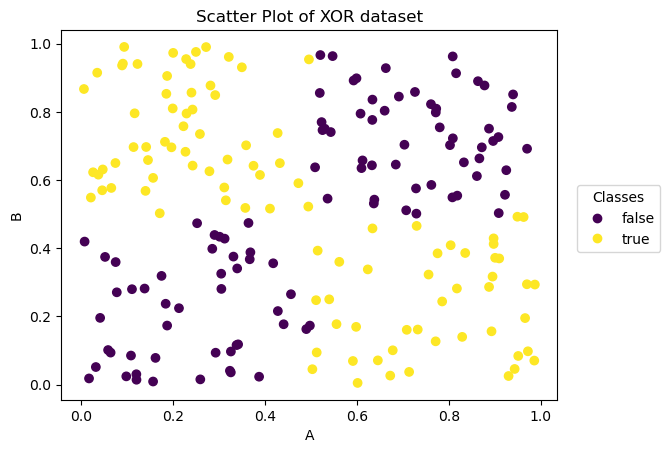

In [139]:

file_name = 'xor_df.csv'
relative_path =   '/../data'

# get save path 
save_path = os.getcwd() +  relative_path # https://stackoverflow.com/questions/39125532/file-does-not-exist-in-jupyter-notebook
full_path = os.path.join(save_path, file_name)
assert  os.path.exists(full_path), f'Path {relative_path}/{file_name} does not exist'

# read via panda reader
df = pd.read_csv(full_path)
df.shape
print(df.head())
target_feature = 'label'

cols = list(df.columns)
print(cols)
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

_, ax = plt.subplots()
#colors = ['red','green']
scatter = ax.scatter(df["A"], df["B"], c=df.out)#cmap=matplotlib.colors.ListedColormap(colors))
ax.set(xlabel="A", ylabel="B")
_ = ax.legend(
    scatter.legend_elements()[0], ["false", "true"], loc=(1.04, 0.4), title="Classes", 
)
ax.set_title("Scatter Plot of XOR dataset")

['A', 'B']
[0 1]
['false', 'true']


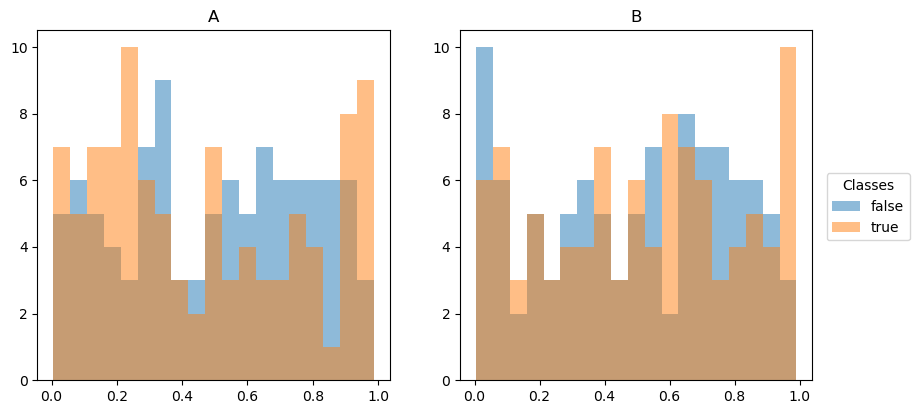

In [140]:
data = df.to_numpy()
labels = df['out']
var_names = ["A", "B"]
target_names = ["false","true"]
print(var_names)
print(np.unique(labels))
print(target_names)

fig = plt.figure(figsize=(10,10))

cs = ["red","green"]
# loop on variables
for i in range(2):
    # create subplot 
    
    plt.subplot(2,2,i+1)
    # select the variable of interest from the data
    values = data[:,i]
    # define histogram binning. 
    # we use 20 bins between the minimum and maximum values
    bins = np.linspace( np.min(values), np.max(values), 20)
    # loop on categories
    for j in np.unique(labels):
        # select values for this category
        categ_values = values[labels==j]
        # plot histogram
        plt.hist(categ_values, bins, alpha=0.5, label=target_names[j])
    plt.title(var_names[i])
plt.legend(loc=(1.04, 0.40), title="Classes")


In [141]:
file_name = 'dummy_df.csv'
relative_path =   '/../data'

# get save path 
save_path = os.getcwd() +  relative_path # https://stackoverflow.com/questions/39125532/file-does-not-exist-in-jupyter-notebook
full_path = os.path.join(save_path, file_name)
assert  os.path.exists(full_path), f'Path {relative_path}/{file_name} does not exist'

# read via panda reader
df = pd.read_csv(full_path)
df.shape
print(df.head())
target_feature = 'out'

cols = list(df.columns)
print(cols)


AssertionError: Path /../data/dummy_df.csv does not exist

Text(0.5, 1.0, 'Scatter Plot of Dummy dataset')

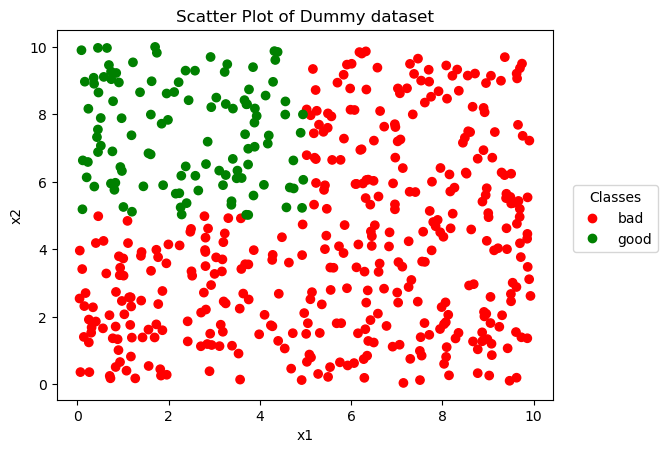

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

_, ax = plt.subplots()
colors = ['red','green']
scatter = ax.scatter(df.x1, df.x2, c=df.out, cmap=matplotlib.colors.ListedColormap(colors))
ax.set(xlabel="x1", ylabel="x2")
_ = ax.legend(
    scatter.legend_elements()[0], ["bad", "good"], loc=(1.04, 0.4), title="Classes", 
)
ax.set_title("Scatter Plot of Dummy dataset")



['x1', 'x2']
[0 1]
['out']


IndexError: boolean index did not match indexed array along dimension 0; dimension is 500 but corresponding boolean dimension is 2

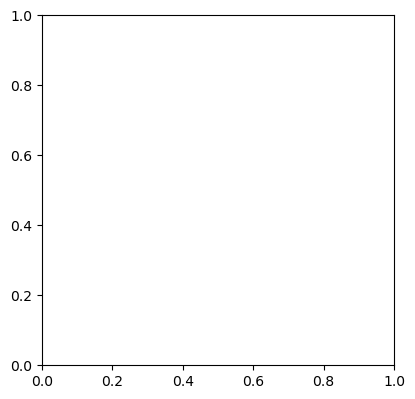

In [ ]:
import matplotlib.pyplot as plt

import numpy as np
from sklearn import datasets



data = df.to_numpy()
labels = [0,1]
var_names = ["x1", "x2"]
target_names = ["out"]
print(var_names)
print(np.unique(labels))
print(target_names)

fig = plt.figure(figsize=(10,10))


# loop on variables
for i in range(4):
    # create subplot 
    
    plt.subplot(2,2,i+1)
    # select the variable of interest from the data
    values = data[:,i]
    # define histogram binning. 
    # we use 20 bins between the minimum and maximum values
    bins = np.linspace( np.min(values), np.max(values), 20)
    # loop on categories
    for j in np.unique(labels):
        # select values for this category
        categ_values = values[labels==j]
        # plot histogram
        plt.hist(categ_values, bins, alpha=0.5, label=target_names[j])
    plt.title(var_names[i])
plt.legend(loc=(1.04, 0.950), title="Classes")

In [ ]:
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn import datasets
from sklearn.preprocessing import StandardScaler


features = ['x1', 'x2']
X = df[features]

pca = PCA(n_components=2)
components = pca.fit_transform(X)

loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

fig = px.scatter(components, x=0, y=1, color=df['out'])

for i, feature in enumerate(features):
    fig.add_annotation(
        ax=0, ay=0,
        axref="x", ayref="y",
        x=loadings[i, 0],
        y=loadings[i, 1],
        showarrow=True,
        arrowsize=2,
        arrowhead=2,
        xanchor="right",
        yanchor="top"
    )
    fig.add_annotation(
        x=loadings[i, 0],
        y=loadings[i, 1],
        ax=0, ay=0,
        xanchor="center",
        yanchor="bottom",
        text=feature,
        yshift=5,
    )
fig.show()

In [ ]:
import mpl_toolkits.mplot3d  # noqa: F401

from sklearn.decomposition import PCA

fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d", elev=-150, azim=110)

X_reduced = PCA(n_components=2).fit_transform(df)
ax.scatter(
    X_reduced[:, 0],
    X_reduced[:, 1],
   # X_reduced[:, 2],
    c=df.out,
    s=40,
)

ax.set_title("First three PCA dimensions")
ax.set_xlabel("1st Eigenvector")
ax.xaxis.set_ticklabels([])
ax.set_ylabel("2nd Eigenvector")
ax.yaxis.set_ticklabels([])
ax.set_zlabel("3rd Eigenvector")
ax.zaxis.set_ticklabels([])

plt.show()

In [ ]:
file_name = 'dummy2_df.csv'
relative_path =   '/../data'

# get save path 
save_path = os.getcwd() +  relative_path # https://stackoverflow.com/questions/39125532/file-does-not-exist-in-jupyter-notebook
full_path = os.path.join(save_path, file_name)
assert  os.path.exists(full_path), f'Path {relative_path}/{file_name} does not exist'

# read via panda reader
df = pd.read_csv(full_path)

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#setosa_df = df[df['Species'] == 0] 
#setosa_df.pop('Species')
#print(setosa_df.head())

print(df.out)
cor_mat = df.corr()
print("cor_mat",cor_mat)


# Create a DataFrame from the correlation matrix
df = pd.DataFrame(cor_mat)

0      1
1      0
2      0
3      0
4      1
      ..
495    0
496    0
497    0
498    0
499    0
Name: out, Length: 500, dtype: int64
cor_mat            x1        x2       out
x1   1.000000  0.010354 -0.467190
x2   0.010354  1.000000  0.499046
out -0.467190  0.499046  1.000000


['x1', 'x2']
[0 1]
['bad', 'good']


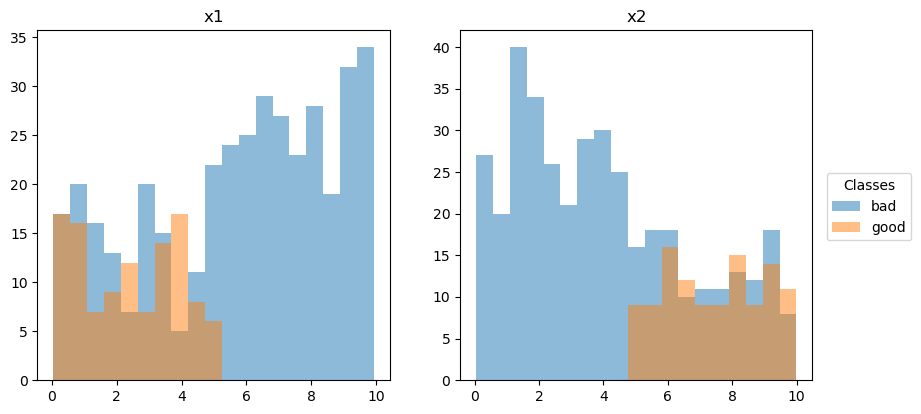

In [ ]:
import matplotlib.pyplot as plt

import numpy as np
from sklearn import datasets

dataset = datasets.load_iris()

data = df.to_numpy()
labels = df['out']
var_names = ["x1", "x2"]
target_names = ["bad","good"]
print(var_names)
print(np.unique(labels))
print(target_names)

fig = plt.figure(figsize=(10,10))

cs = ["red","green"]
# loop on variables
for i in range(2):
    # create subplot 
    
    plt.subplot(2,2,i+1)
    # select the variable of interest from the data
    values = data[:,i]
    # define histogram binning. 
    # we use 20 bins between the minimum and maximum values
    bins = np.linspace( np.min(values), np.max(values), 20)
    # loop on categories
    for j in np.unique(labels):
        # select values for this category
        categ_values = values[labels==j]
        # plot histogram
        plt.hist(categ_values, bins, alpha=0.5, label=target_names[j])
    plt.title(var_names[i])
plt.legend(loc=(1.04, 0.40), title="Classes")



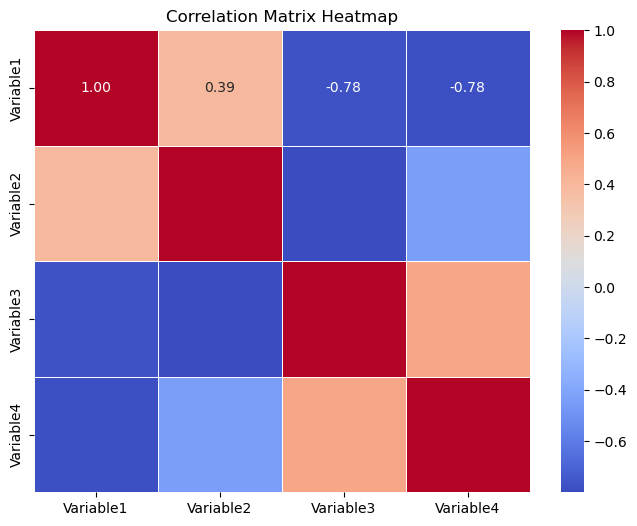

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data (replace this with your correlation matrix)
data = {
    'Variable1': [1.0, 0.8, 0.2, -0.5],
    'Variable2': [0.8, 1.0, -0.3, 0.6],
    'Variable3': [0.2, -0.3, 1.0, 0.9],
    'Variable4': [-0.5, 0.6, 0.9, 1.0],
   # 'Variable4': [1., 1., 1., 1.],
}

# Create a DataFrame from the correlation matrix
df = pd.DataFrame(data)

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [142]:
import matplotlib.pyplot as plt

import numpy as np
from sklearn import datasets

dataset = datasets.load_iris()
dataset
df = pd.DataFrame(dataset['data'], columns=dataset['feature_names'])
df = df.assign(Species= dataset['target'])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [143]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#setosa_df = df[df['Species'] == 0] 
#setosa_df.pop('Species')
#print(setosa_df.head())

# a very weird way of setting all setosa entries in species to 1 and all other to 0
# note pd where works diff to np where
# everything that is false gets replaced
df["Species"] = df['Species'].where(df['Species'] != 0, 5 )
df["Species"] = df['Species'].where(df['Species'] == 5, 0 )
df["Species"] = df['Species'].where(df['Species'] == 0, 1 )
#setosa_df = df.where(df['Species'] != 5., 1. )
print(df)

cor_mat = df.corr()
print("cor_mat",cor_mat)


# Create a DataFrame from the correlation matrix
df = pd.DataFrame(cor_mat)


# drop last row
df = df.iloc[:-1] # drop row
print("cor_mat",df)

# Select only the last column of the correlation matrix
last_column = df.iloc[:, -1]

# Create a DataFrame with only the last column
df_last_column_setosa = pd.DataFrame(last_column, columns=[last_column.name])

# # Create a heatmap using seaborn for the last column
# plt.figure(figsize=(6, 4))
# sns.heatmap(df_last_column, annot=True, fmt=".2f", linewidths=.5)
# plt.title(f'Correlation Heatmap for Setosa')
# plt.show()

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

     Species  
0          1

In [175]:
import matplotlib.pyplot as plt

import numpy as np
from sklearn import datasets

dataset = datasets.load_iris()
dataset
df = pd.DataFrame(dataset['data'], columns=dataset['feature_names'])
df = df.assign(Species= dataset['target'])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [176]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#setosa_df = df[df['Species'] == 0] 
#setosa_df.pop('Species')
#print(setosa_df.head())

# a very weird way of setting all setosa entries in species to 1 and all other to 0
# note pd where works diff to np where
# everything that is false gets replaced
df["Species"] = df['Species'].where(df['Species'] != 1, 5 ) # own number to 5
df["Species"] = df['Species'].where(df['Species'] == 5, 0 ) # everything else to 0
df["Species"] = df['Species'].where(df['Species'] == 0, 1 ) # 5 to 0
#setosa_df = df.where(df['Species'] != 5., 1. )
print(df.iloc[89])

cor_mat = df.corr()
print("cor_mat",cor_mat)


# Create a DataFrame from the correlation matrix
df = pd.DataFrame(cor_mat)

df.rename(columns={"Species": "Versicolor"})
# drop last row
df = df.iloc[:-1] # drop row
print("cor_mat",df)

# Select only the last column of the correlation matrix
last_column = df.iloc[:, -1]

# Create a DataFrame with only the last column
df_last_column_versi = pd.DataFrame(last_column, columns=[last_column.name])

# Create a heatmap using seaborn for the last column
# plt.figure(figsize=(6, 4))
# sns.heatmap(df_last_column, annot=True, fmt=".2f", linewidths=.5)
# plt.title(f'Correlation Heatmap for Versicolor')
# plt.show()

sepal length (cm)    5.5
sepal width (cm)     2.5
petal length (cm)    4.0
petal width (cm)     1.3
Species              1.0
Name: 89, dtype: float64
cor_mat                    sepal length (cm)  sepal width (cm)  petal length (cm)  \
sepal length (cm)           1.000000         -0.117570           0.871754   
sepal width (cm)           -0.117570          1.000000          -0.428440   
petal length (cm)           0.871754         -0.428440           1.000000   
petal width (cm)            0.817941         -0.366126           0.962865   
Species                     0.079396         -0.467703           0.201754   

                   petal width (cm)   Species  
sepal length (cm)          0.817941  0.079396  
sepal width (cm)          -0.366126 -0.467703  
petal length (cm)          0.962865  0.201754  
petal width (cm)           1.000000  0.117899  
Species                    0.117899  1.000000  
cor_mat                    sepal length (cm)  sepal width (cm)  petal length (cm)  \
sepal 

In [182]:
import matplotlib.pyplot as plt

import numpy as np
from sklearn import datasets

dataset = datasets.load_iris()
dataset
df = pd.DataFrame(dataset['data'], columns=dataset['feature_names'])
df = df.assign(Species= dataset['target'])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


sepal length (cm)    5.5
sepal width (cm)     2.5
petal length (cm)    4.0
petal width (cm)     1.3
Species              0.0
Name: 89, dtype: float64
cor_mat                    sepal length (cm)  sepal width (cm)  petal length (cm)  \
sepal length (cm)           1.000000         -0.117570           0.871754   
sepal width (cm)           -0.117570          1.000000          -0.428440   
petal length (cm)           0.871754         -0.428440           1.000000   
petal width (cm)            0.817941         -0.366126           0.962865   
Species                     0.638020         -0.135645           0.721011   

                   petal width (cm)   Species  
sepal length (cm)          0.817941  0.638020  
sepal width (cm)          -0.366126 -0.135645  
petal length (cm)          0.962865  0.721011  
petal width (cm)           1.000000  0.769445  
Species                    0.769445  1.000000  
cor_mat                    sepal length (cm)  sepal width (cm)  petal length (cm)  \
sepal 

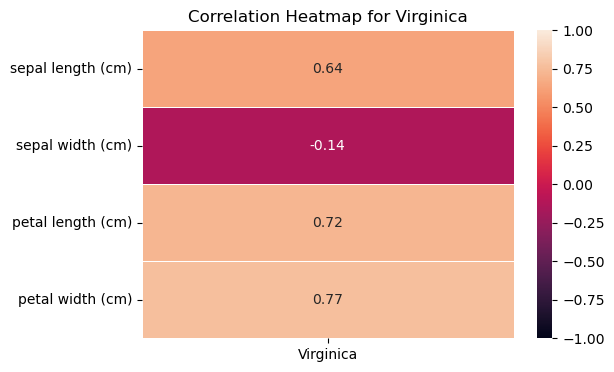

In [183]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#setosa_df = df[df['Species'] == 0] 
#setosa_df.pop('Species')
#print(setosa_df.head())

# a very weird way of setting all setosa entries in species to 1 and all other to 0
# note pd where works diff to np where
# everything that is false gets replaced
df["Species"] = df['Species'].where(df['Species'] != 2, 5 ) # own number to 5
df["Species"] = df['Species'].where(df['Species'] == 5, 0 ) # everything else to 0
df["Species"] = df['Species'].where(df['Species'] == 0, 1 ) # 5 to 0
#setosa_df = df.where(df['Species'] != 5., 1. )
print(df.iloc[89])

cor_mat = df.corr()
print("cor_mat",cor_mat)


# Create a DataFrame from the correlation matrix
df = pd.DataFrame(cor_mat)


# drop last row
df = df.iloc[:-1] # drop row
print("cor_mat",df) 

df = df.rename(columns={"Species": "Virginica"})

# Select only the last column of the correlation matrix
last_column = df.iloc[:, -1]

# Create a DataFrame with only the last column
df_last_column_virgi = pd.DataFrame(last_column, columns=[last_column.name])

# # Create a heatmap using seaborn for the last column
plt.figure(figsize=(6, 4))
sns.heatmap(df_last_column_virgi, vmin=-1, vmax=1,annot=True, fmt=".2f", linewidths=.5)
plt.title(f'Correlation Heatmap for Virginica')
plt.show()

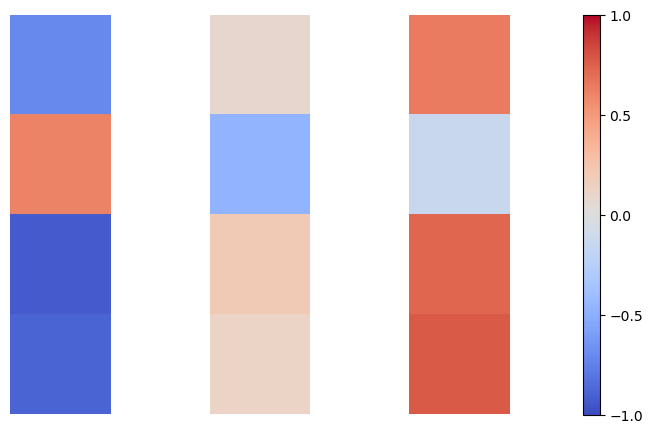

In [184]:
import matplotlib.pyplot as plt
import numpy as np

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(8.5, 5))

dfs =[df_last_column_setosa, df_last_column_versi, df_last_column_virgi]
for i,ax in enumerate(axes.flat):
    ax.set_axis_off()
   # im = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
    im = ax.imshow(dfs[i], cmap='coolwarm', vmin=-1, vmax=1)

fig.subplots_adjust(bottom=0.1, top=0.9, left=0.1, right=0.8,
                    wspace=0.02, hspace=0.02)

# add an axes, lower left corner in [0.83, 0.1] measured in figure coordinate with axes width 0.02 and height 0.8

cb_ax = fig.add_axes([0.83, 0.1, 0.02, 0.8])
cbar = fig.colorbar(im, cax=cb_ax)

# set the colorbar ticks and tick labels
cbar.set_ticks(np.arange(-1, 1.1, 0.5))
#plt.title(f'Correlation Heatmap for Virginica')
#cbar.set_ticklabels(['low', 'medium', 'high'])

plt.show()


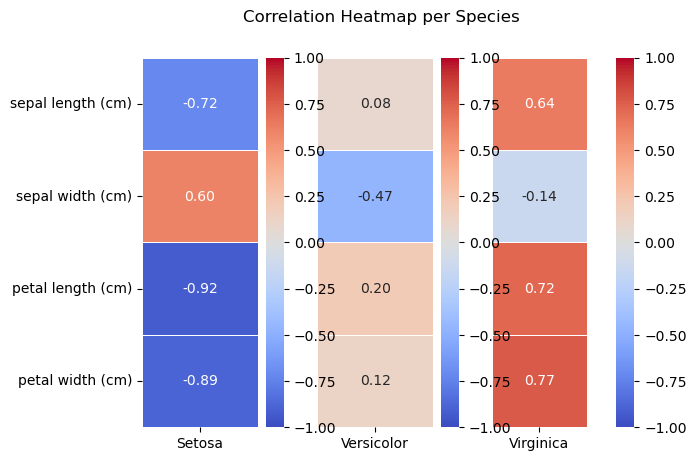

In [200]:


fig, ax =plt.subplots(1,3)

sns.heatmap(df_last_column_setosa, ax=ax[0], vmin=-1, vmax=1, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, cbar=False, xticklabels=["Setosa"])
sns.heatmap(df_last_column_versi, ax=ax[1], vmin=-1, vmax=1, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, cbar=False, yticklabels=False, xticklabels=["Versicolor"])
sns.heatmap(df_last_column_virgi, ax=ax[2],vmin=-1, vmax=1, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, yticklabels=False, xticklabels=["Virginica"], cbar_kws={ "pad":0.2})

plt.suptitle("Correlation Heatmap per Species")

plt.show()

ValueError: The number of FixedLocator locations (5), usually from a call to set_ticks, does not match the number of labels (3).

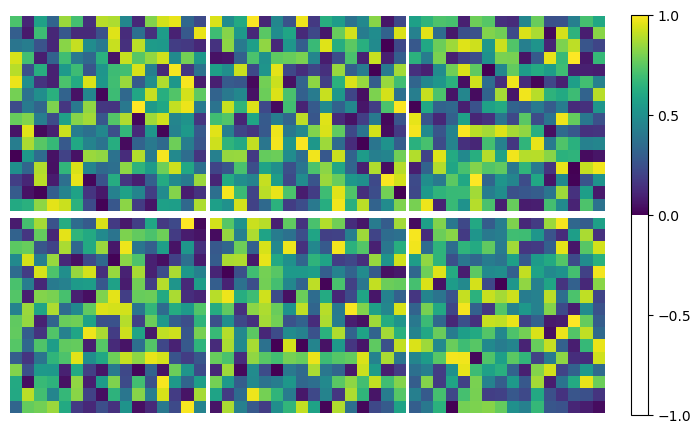

In [181]:
import matplotlib.pyplot as plt
import numpy as np

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(8.5, 5))

for ax in axes.flat:
    ax.set_axis_off()
    im = ax.imshow(np.random.random((16, 16)), cmap='viridis',
                   vmin=0, vmax=1)

fig.subplots_adjust(bottom=0.1, top=0.9, left=0.1, right=0.8,
                    wspace=0.02, hspace=0.02)

# add an axes, lower left corner in [0.83, 0.1] measured in figure coordinate with axes width 0.02 and height 0.8

cb_ax = fig.add_axes([0.83, 0.1, 0.02, 0.8])
cbar = fig.colorbar(im, cax=cb_ax)

# set the colorbar ticks and tick labels
cbar.set_ticks(np.arange(-1, 1.1, 0.5))
cbar.set_ticklabels(['low', 'medium', 'high'])

plt.show()


In [ ]:
['setosa' 'versicolor' 'virginica']

['setosaversicolorvirginica']